<a href="https://colab.research.google.com/github/raina02/InternshipStudio_Project/blob/master/InternshipStudio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Features and MSRP**

# 1.Uploading the dataset

Using files.upload() directly in the Colab notebook gives you a traditional upload button that allows you to move files from your computer into to the Colab environment.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


## Importing the required Libraries

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                   ##Visualisation
import seaborn as sns                             ## Visualisation
%matplotlib inline

###1.1 Loading the data into Data frame

In [217]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [218]:
## To display the top 10 rows
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [219]:
## To display the bottom 10 rows
df.tail(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11904,BMW,Z8,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000
11905,BMW,Z8,2003,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,131500
11906,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46020
11907,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56570
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [220]:
## To get an estimate of the total data file.
df.shape

(11914, 16)

###1.2 Checking the Data types of data and Statistics Summary

In [221]:
## To get the data types of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**Only Continuous Data**

In [222]:
## Describes the dataset
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [223]:
## Covariance
df.cov()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,57.452457,2.915880e+02,-0.560066,1.762368,17.348355,13.500413,7.983461e+02,1.036924e+05
Engine HP,291.588019,1.192286e+04,149.338158,-9.892033,-342.948789,-340.853727,5.891934e+03,4.355284e+06
Engine Cylinders,-0.560066,1.493382e+02,3.170392,-0.219406,-9.516859,-9.084998,1.057135e+02,5.693262e+04
Number of Doors,1.762368,-9.892033e+00,-0.219406,0.776717,0.911541,0.942308,-6.135446e+01,-6.704131e+03
highway MPG,17.348355,-3.429488e+02,-9.516859,0.911541,78.552783,70.643828,-2.682478e+02,-8.526226e+04
city mpg,13.500413,-3.408537e+02,-9.084998,0.942308,70.643828,80.780516,-4.168582e+01,-8.518407e+04
Popularity,798.346061,5.891934e+03,105.713515,-61.354465,-268.247758,-41.685824,2.078947e+06,-4.201369e+06
MSRP,103692.370363,4.355284e+06,56932.619101,-6704.130906,-85262.262046,-85184.071075,-4.201369e+06,3.613104e+09


In [224]:
##Mean MSRP
df['MSRP'].mean()

40594.737032063116

In [225]:
# only the continous data columns
x=df.loc[:,['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG', 'city mpg','Popularity','MSRP']]
x

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120
11910,2012,300.0,6.0,4.0,23,16,204,56670
11911,2012,300.0,6.0,4.0,23,16,204,50620
11912,2013,300.0,6.0,4.0,23,16,204,50920


#2. Dropping Irrelevant Columns from the dataset

This step is required in Exploratory data Analysis as there are columns that we never use and in such cases dropping them will be useful, the columns such as Engine Fuel type, Market Category and Number of Doors may not be relevant.

In [226]:
df = df.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


## Encoding for categorical data

In [227]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['Transmission Type']= le.fit_transform(df['Transmission Type']) 
df['Driven_Wheels']= le.fit_transform(df['Driven_Wheels']) 
df['Vehicle Size']= le.fit_transform(df['Vehicle Size']) 
df['Vehicle Style']= le.fit_transform(df['Vehicle Style']) 

In [228]:
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,3,3,0,8,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,3,3,0,6,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,3,3,0,8,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,3,3,0,8,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,3,3,0,6,28,18,3916,34500


#3. Renaming the Columns

Column name can be confusing or not readable, so its usually a good practice to rename the column names to improve the readability of the dataset.

In [229]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission","Driven_Wheels": "DrivenMode", "highway MPG": "MPG-H","city mpg":"MPG-C","MSRP": "Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,DrivenMode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,3,3,0,8,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,3,3,0,6,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,3,3,0,8,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,3,3,0,8,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,3,3,0,6,28,18,3916,34500


# 4. Dropping the Duplicate rows

This is often a handy thing to do in cases of huge datasets consisting of more than 10,000 rows often have some duplicate data, so here we remove all the duplicates values from the given data set.

In [230]:
df.shape

(11914, 13)

In [231]:
duplicate_rows_df = df[df.duplicated()]
print("The total number of duplicated rows are:-", duplicate_rows_df)

The total number of duplicated rows are:-          Make     Model  Year     HP  ...  MPG-H  MPG-C  Popularity  Price
14        BMW  1 Series  2013  230.0  ...     28     19        3916  31500
18       Audi       100  1992  172.0  ...     24     17        3105   2000
20       Audi       100  1992  172.0  ...     24     17        3105   2000
24       Audi       100  1993  172.0  ...     24     17        3105   2000
25       Audi       100  1993  172.0  ...     24     17        3105   2000
...       ...       ...   ...    ...  ...    ...    ...         ...    ...
11481  Suzuki      X-90  1998   95.0  ...     26     22         481   2000
11603   Volvo      XC60  2017  302.0  ...     29     20         870  46350
11604   Volvo      XC60  2017  240.0  ...     30     23         870  40950
11708  Suzuki       XL7  2008  252.0  ...     22     15         481  29149
11717  Suzuki       XL7  2008  252.0  ...     22     16         481  27499

[792 rows x 13 columns]


In [232]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,DrivenMode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,3,3,0,8,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,3,3,0,6,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,3,3,0,8,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,3,3,0,8,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,3,3,0,6,28,18,3916,34500


In [233]:
df.shape

(11122, 13)

##4.1 Dropping the missing or null Values or Imputing them

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later or can even be imputed. Now, dropping is not the best approach and generally people just replace the missing values with the mean or the average of that column. This helps in fine tuning the model performance as more the data, a model has the better it performs. But the objective of this project is to do EDA and its fine even if we drop the missing values as the number of missing values is small as compared to the entire dataset.

In [234]:
df.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
DrivenMode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

In [235]:
df.apply(lambda x:sum(x.isnull()),axis=0)      # get a count of missing values in dataset

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
DrivenMode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

## 4.2 We are going forward with Imputing values rather than dropping the values

We are going to impute element that occurs the most in that column.

In [236]:
df['HP'].value_counts()

200.0    378
170.0    261
240.0    251
285.0    246
210.0    243
        ... 
557.0      1
123.0      1
535.0      1
372.0      1
163.0      1
Name: HP, Length: 356, dtype: int64

In [238]:
df['HP'].fillna('200.0',inplace=True)            ## filling the element that occurs the most which is 200.0 in this case

In [239]:
df['Cylinders'].value_counts()

4.0     4361
6.0     4283
8.0     1897
12.0     228
5.0      169
10.0      65
0.0       56
3.0       30
16.0       3
Name: Cylinders, dtype: int64

In [240]:
df['Cylinders'].fillna('4.0',inplace=True)   ## filling the element that occurs the most which is 4.0 in this case

In [241]:
df.apply(lambda x:sum(x.isnull()),axis=0)      # get a count of missing values in dataset

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
DrivenMode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

# 5. Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, HP, and Enginesize.

All the plots you can find some points are outside the box, they are then outliers. 

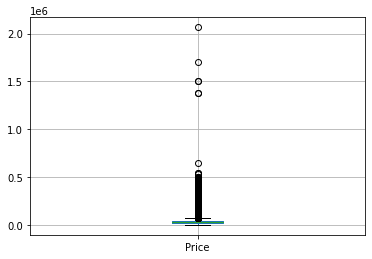

In [242]:
df.boxplot(column='Price')

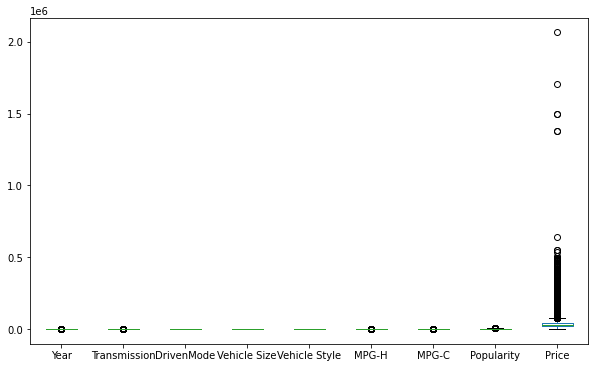

In [243]:
df.plot(kind='box',figsize=(10,6))

##Error : spaces in column names
## Tried to rename it to a single name but still no change in the error.

In [ ]:
df.boxplot(column='HP')

In [ ]:
df.boxplot(column='Cylinders')

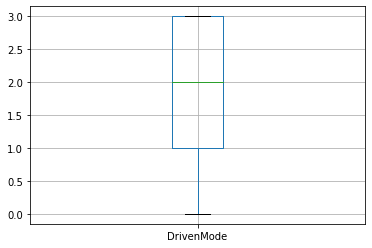

In [249]:
df.boxplot(column='DrivenMode')

Bi Variate analysis

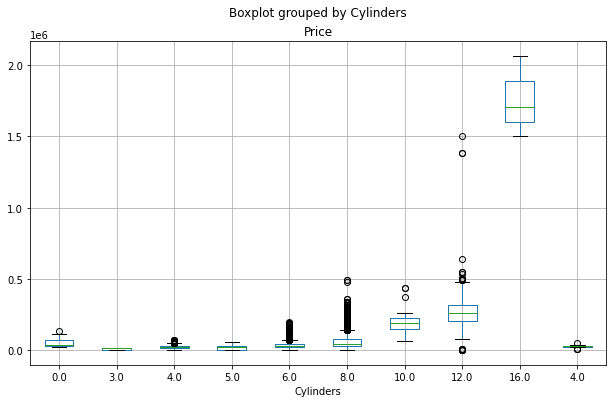

In [252]:
df.boxplot(column='Price', by='Cylinders', figsize=(10,6))

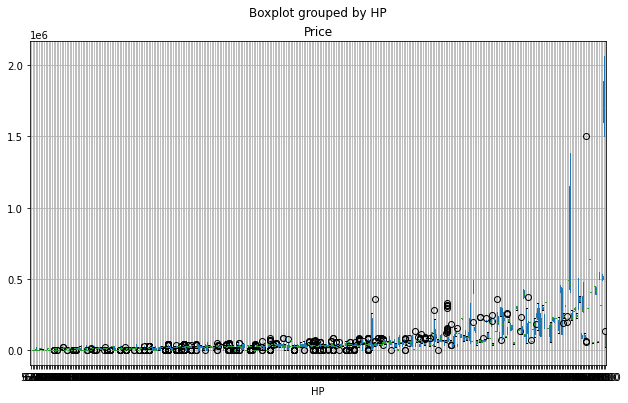

In [255]:
df.boxplot(column='Price', by='HP', figsize=(10,6))

Observations

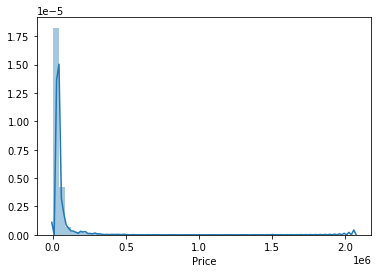

In [257]:
sns.distplot(df['Price'])

{'boxes': [<matplotlib.patches.PathPatch at 0x7ff98d1a2080>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff98d1a27b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff98d12b278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff98d1a2eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff98d1a2320>,
  <matplotlib.lines.Line2D at 0x7ff98d1a2438>]}

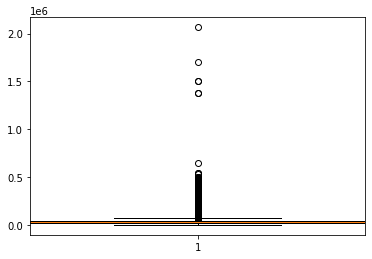

In [258]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df['Price'], widths = 1, patch_artist = True)

{'boxes': [<matplotlib.patches.PathPatch at 0x7ff98d05b4e0>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff98d05bc18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff98d0686d8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff98d068358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff98d05b780>,
  <matplotlib.lines.Line2D at 0x7ff98d05b898>]}

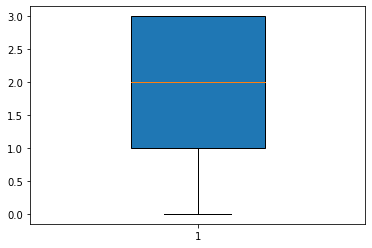

In [260]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df['DrivenMode'], widths = 0.4, patch_artist = True)

Removing outliers

In [261]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year                 9.0
Transmission         0.0
DrivenMode           2.0
Vehicle Size         2.0
Vehicle Style       11.0
MPG-H                8.0
MPG-C                6.0
Popularity        1460.0
Price            21395.0
dtype: float64


In [262]:
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]  ##removing outliers

In [263]:
df.shape

(6360, 13)

## 6. The most represented car Brands

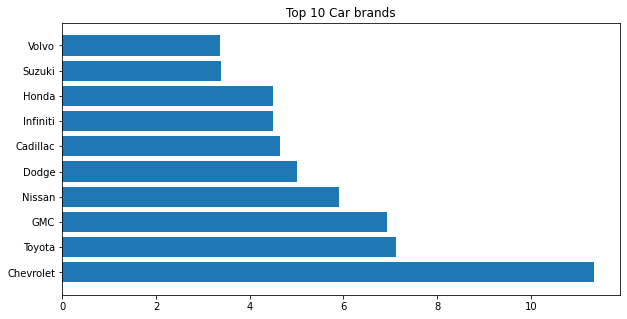

In [264]:
#percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

#Top 10 car brands
popular_brands = counts.index[:10]

#Plotting the bar graph
plt.figure(figsize=(10,5))
plt.barh(popular_brands, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [266]:
##Average price
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
                                   (df['Make'] == 'Ford')|
                                  (df['Make'] == 'Volkswagen')|
                                  (df['Make'] == 'Toyota')|
                                  (df['Make'] == 'Dodge')|
                                  (df['Make'] == 'Nissan')|
                                  (df['Make'] == 'GMC')|
                                  (df['Make'] == 'Honda')|
                                  (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)                                  

                   Price
Make                    
Chevrolet   30878.653259
Dodge       27799.858491
GMC         34474.401361
Honda       29546.010490
Mazda       25214.592233
Nissan      31138.231383
Toyota      31342.423841
Volkswagen  30568.990610


# 7. Correlation Matrix

In [267]:
cor=df.corr()

In [268]:
##Correlation between columns
cor

,Year,Transmission,DrivenMode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
Year,1.000000,NaN,-0.178890,-0.024009,-0.102934,0.402471,0.398630,0.252749,0.509291
Transmission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DrivenMode,-0.178890,NaN,1.000000,-0.100875,0.173758,-0.009001,-0.058528,-0.019595,-0.198953
Vehicle Size,-0.024009,NaN,-0.100875,1.000000,0.069424,-0.075682,-0.162315,-0.046362,0.199966
Vehicle Style,-0.102934,NaN,0.173758,0.069424,1.000000,0.164249,0.034987,-0.012809,-0.061333
MPG-H,0.402471,NaN,-0.009001,-0.075682,0.164249,1.000000,0.932531,0.130100,-0.132837
MPG-C,0.398630,NaN,-0.058528,-0.162315,0.034987,0.932531,1.000000,0.123880,-0.180788
Popularity,0.252749,NaN,-0.019595,-0.046362,-0.012809,0.130100,0.123880,1.000000,0.073593
Price,0.509291,NaN,-0.198953,0.199966,-0.061333,-0.132837,-0.180788,0.073593,1.000000


The above table shows:

1. High correlation between 
 - MPG-H & MPG-C

2. High Anti Correlation
  - Cylinders & MPG-H

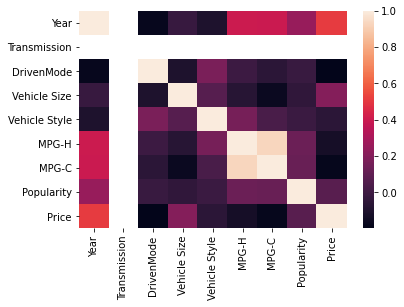

In [269]:
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns)

MPG-H has a strong negative correlation with highway and MPG-C because lower MPG figures mean higher fuel consumption.

# 8. EDA

## Scatter Plot



In [271]:
HP=df['HP']
MSRP=df['Price']

TypeError: ignored

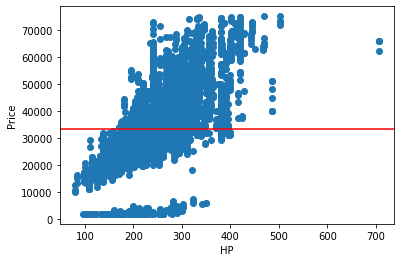

In [274]:
plt.plot(HP,MSRP,'o')
plt.ylabel("Price")
plt.xlabel("HP")
plt.axhline(MSRP.mean(),color='r',linestyle='-')
sns.regplot(x='HP',y='Price',df=df)
plt.show()

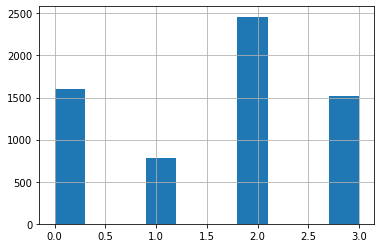

In [276]:
df['DrivenMode'].hist(bins=10)

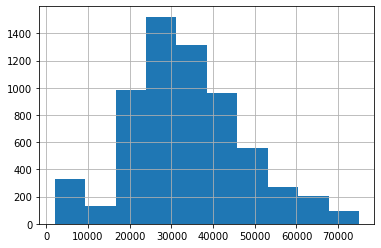

In [278]:
%matplotlib inline
df['Price'].hist(bins=10)

Which Vehicle style segment of cars are sold the most

Text(0.5, 0, 'Body type')

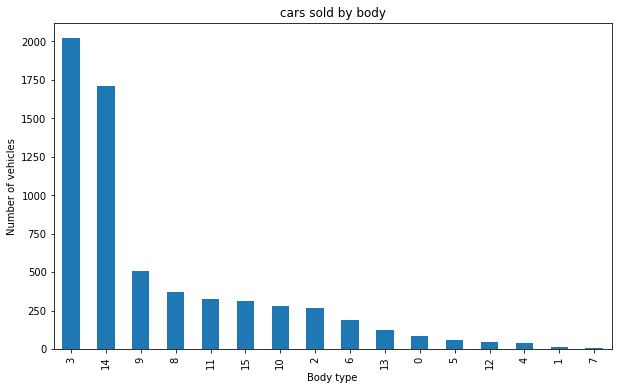

In [279]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))
plt.title("cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body type')

From the above chart we can see thta the Sedan cars were the most sold cars followed by 4dr SUV

Text(0.5, 0, 'Count of vehicles')

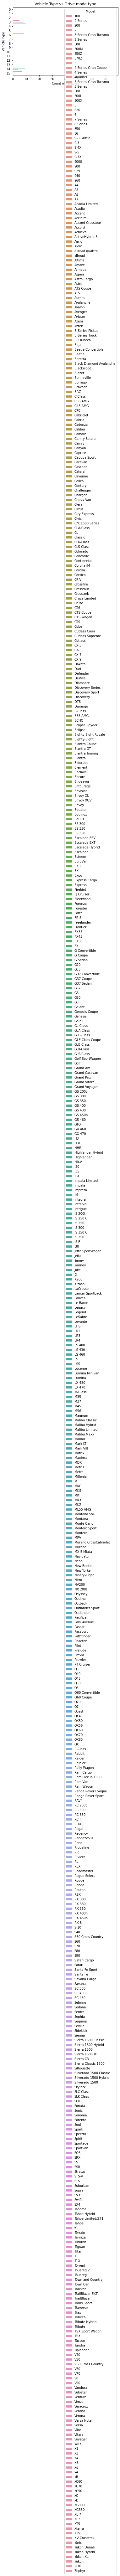

In [309]:
## Vehicle Style type and Drive type analysis
sns.countplot(y='Vehicle Style', data=df, hue = 'Model')
plt.title("Vehicle Type vs Drive mode type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')

**Making a new MSRP group**

In [282]:
# create a new column 'Price_group' and assign the value based on car price
df['Price_group'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000],
                          labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
df['Price_group'] = df['Price_group'].astype(object)

Text(0.5, 0, 'Price Group')

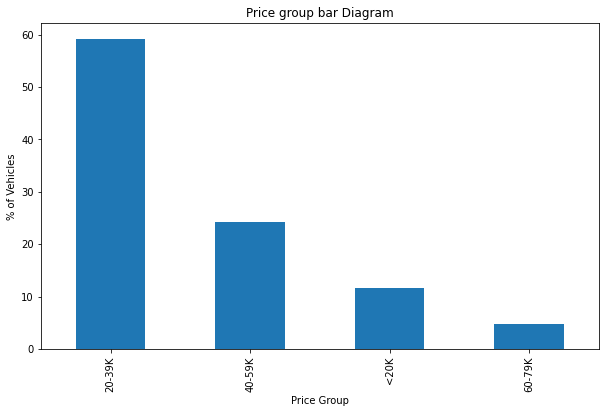

In [283]:
(df['Price_group'].value_counts()/len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price group bar Diagram")
plt.ylabel('% of Vehicles')
plt.xlabel('Price Group')

# 9. Base Models

In [284]:
X = df[['Popularity', 'Year','HP','Cylinders','MPG-H','MPG-C']].values
Y = df['Price'].values

In [285]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y.reshape(-1,1))

In [287]:
#Splitting the dataset into Training and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 0)


In [289]:
#Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

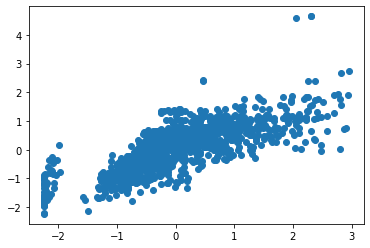

In [290]:
#Predicting the Test set results
Y_pred = regressor.predict(X_test)
plt.scatter(Y_test,Y_pred)

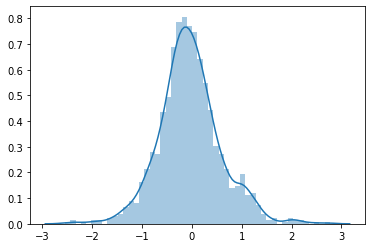

In [291]:
sns.distplot((Y_test-Y_pred), bins=50)

In [293]:
from sklearn import metrics
print('Mean absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('R2 Score:', metrics.r2_score(Y_test,Y_pred))

Mean absolute Error: 0.4699174905472828
Root Mean Squared Error: 0.6261480584891849
R2 Score: 0.6138304085775598


# 10. Spot Checking Algorithms

## Polynomial Regression

In [294]:
#Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, Y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

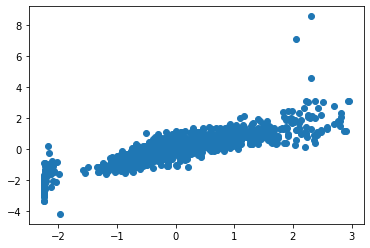

In [295]:
#Predicting a new result with polynomial Regression
Y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(Y_test,Y_pred)

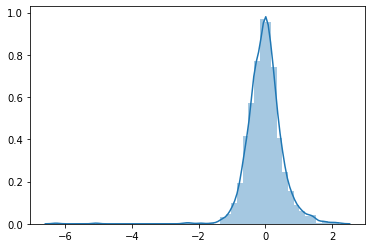

In [296]:
sns.distplot((Y_test-Y_pred), bins=50)

In [297]:
print('Mean absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('R2 Score:', metrics.r2_score(Y_test,Y_pred))

Mean absolute Error: 0.36899720072416453
Root Mean Squared Error: 0.536896808931025
R2 Score: 0.7160736878556935


## SVR 

In [298]:
#fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

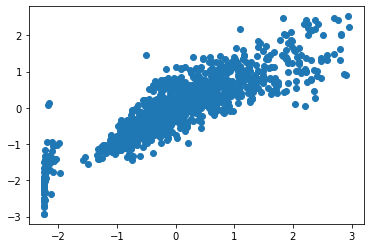

In [299]:
#Predicting a new result
Y_pred = regressor.predict(X_test)
plt.scatter(Y_test,Y_pred)

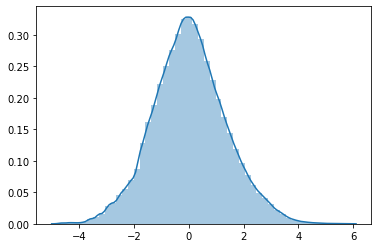

In [300]:
sns.distplot((Y_test-Y_pred), bins=50)

In [301]:
print('Mean absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('R2 Score:', metrics.r2_score(Y_test,Y_pred))

Mean absolute Error: 0.34244073141319215
Root Mean Squared Error: 0.47547054181754084
R2 Score: 0.7773251204239391


## Random Forest Regression

In [302]:
#Fitting Random forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

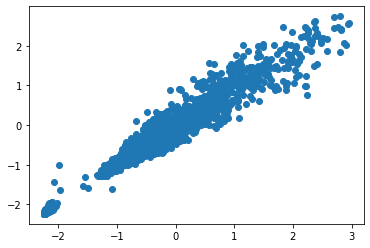

In [303]:
#Predicting a new result
Y_pred = regressor.predict(X_test)
plt.scatter(Y_test,Y_pred)

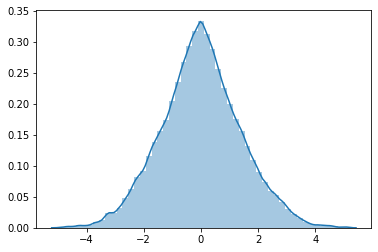

In [304]:
sns.distplot((Y_test-Y_pred), bins=50)

In [305]:
print('Mean absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('R2 Score:', metrics.r2_score(Y_test,Y_pred))

Mean absolute Error: 0.20757264161819275
Root Mean Squared Error: 0.2833177676375753
R2 Score: 0.9209373041936197
